### Moving Average
- rolling(window=)

In [3]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [4]:
ticker = 'AAPL'
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(ticker, start)

In [5]:
data.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096458
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376099
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770


In [7]:
#calculate(sum, mean....) for the last 2 days
data['Close'].rolling(window=2).sum()

Date
2020-01-02           NaN
2020-01-03    149.445000
2020-01-06    149.307495
2020-01-07    149.547501
2020-01-08    150.395004
                 ...    
2021-10-26    297.960007
2021-10-27    298.170013
2021-10-28    301.420013
2021-10-29    302.370010
2021-11-01    298.760010
Name: Close, Length: 463, dtype: float64

In [10]:
data['MA10'] = data['Close'].rolling(10).mean()

In [11]:
data[data['MA10']>0]

,High,Low,Open,Close,Volume,Adj Close,MA10
Date,,,,,,,
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,76.807693,76.502499
2020-01-16,78.925003,78.022499,78.397499,78.809998,108829200.0,77.769814,76.874749
2020-01-17,79.684998,78.750000,79.067497,79.682503,137816400.0,78.630806,77.407249
2020-01-21,79.754997,79.000000,79.297501,79.142502,110843200.0,78.097939,77.826500
2020-01-22,79.997498,79.327499,79.644997,79.425003,101832400.0,78.376717,78.309250
...,...,...,...,...,...,...,...
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.320007,147.020999
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.850006,147.814999
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,152.570007,148.696001


### EMA .ewm(span, adjust)

In [12]:
data['EMA10']= data['Close'].ewm(span=10, adjust=False).mean()

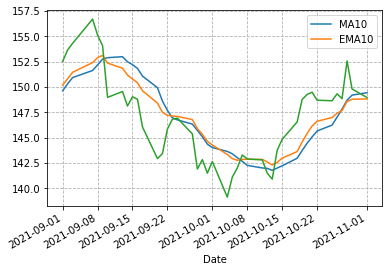

In [14]:
fig, ax =plt.subplots()
data[['MA10','EMA10']].loc['2021-09-01':].plot(ax=ax)
data['Close'].loc['2021-09-01':].plot(ax=ax)
ax.grid(linestyle='--')

In [15]:
data['MA20'] = data['Close'].rolling(20).mean()

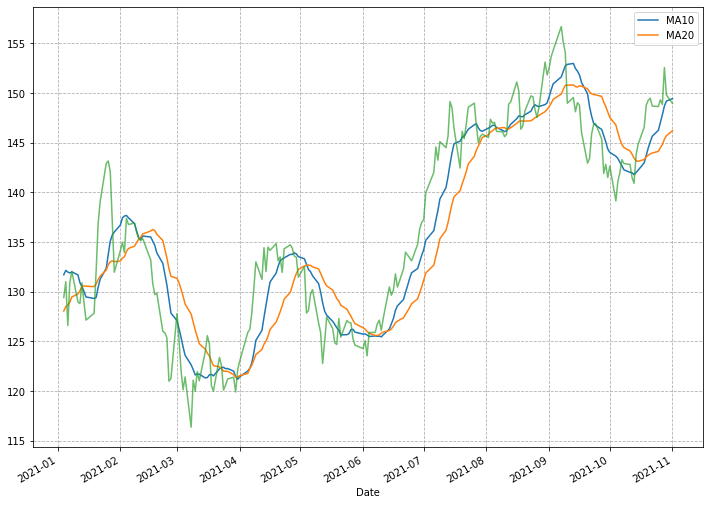

In [18]:
fig, ax =plt.subplots(figsize=(12,9))
data[['MA10','MA20']].loc['2021-01-01':].plot(ax=ax)
data['Close'].loc['2021-01-01':].plot(ax=ax, alpha=.7)
ax.grid(linestyle='--')

### MACD
- MACD = 12-periodEMA - 26-period EMA
- Singal line = 9-period EMA of MACD

In [19]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1-exp2
data.head(6)

,High,Low,Open,Close,Volume,Adj Close,MA10,EMA10,MA20,MACD
Date,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096458,NaN,75.087502,NaN,0.000000
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376099,NaN,74.954774,NaN,-0.058234
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,NaN,74.953905,NaN,-0.055930
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612923,NaN,74.889105,NaN,-0.081607
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797089,NaN,75.054268,NaN,-0.005068
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.385834,NaN,75.482128,NaN,0.183389


In [20]:
data['signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [21]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,MA10,EMA10,MA20,MACD,signal line
Date,,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096458,NaN,75.087502,NaN,0.000000,0.000000
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376099,NaN,74.954774,NaN,-0.058234,-0.011647
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,NaN,74.953905,NaN,-0.055930,-0.020503
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612923,NaN,74.889105,NaN,-0.081607,-0.032724
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797089,NaN,75.054268,NaN,-0.005068,-0.027193


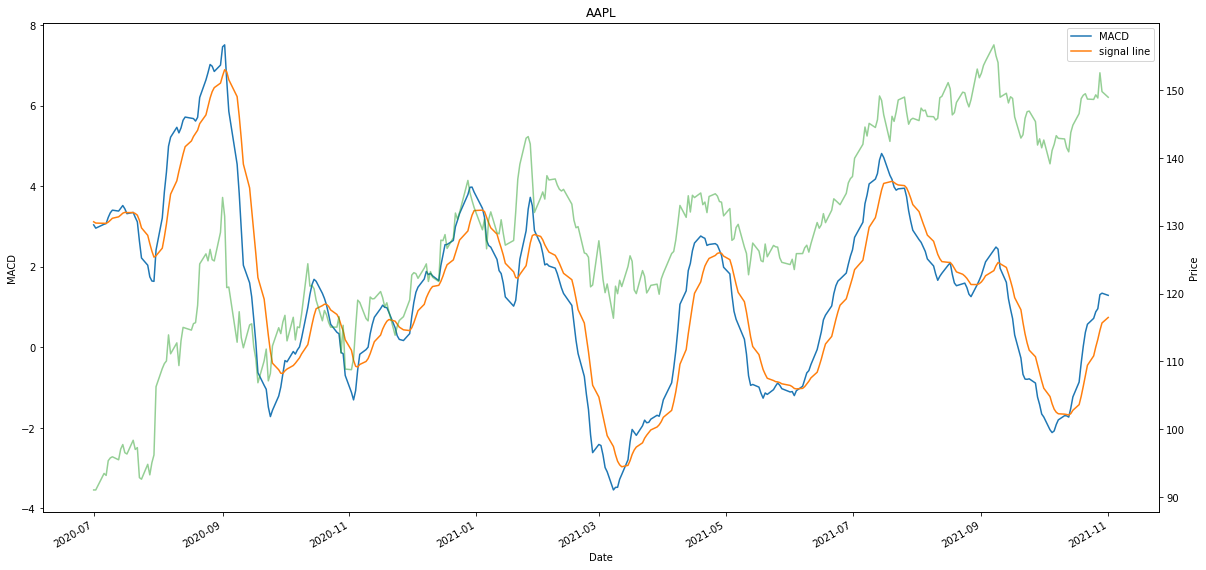

In [27]:
fig, ax =plt.subplots(figsize=(20,10))
data[['MACD','signal line']]['2020-07-01':].plot(ax=ax)
ax2 = data['Close']['2020-07-01':].plot(ax=ax, alpha=0.5, secondary_y=True)
ax.set_title(ticker)
ax.set_ylabel('MACD')
ax2.set_ylabel('Price');

### Stochastic oscillator
It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.

The primary limitation of the stochastic oscillator is that it has been known to produce false signals. This is when a trading signal is generated by the indicator, yet the price does not actually follow through, which can end up as a losing trade. 
During volatile market conditions, this can happen quite regularly. One way to help with this is to take the price trend as a filter, where signals are only taken if they are in the same direction as the trend.

The Formula for the Stochastic Oscillator Is
\begin{aligned} &\text{%K}=\left(\frac{\text{C} - \text{L14}}{\text{H14} - \text{L14}}\right)\times100\\ &\textbf{where:}\\ &\text{C = The most recent closing price}\\ &\text{L14 = The lowest price traded of the 14 previous trading sessions}\\ &\text{H14 = The highest price traded during the same 14-day period}\\ &\text{%K = The current value of the stochastic indicator}\\ &\text{%D = 3-period moving average of %K}\\\end{aligned} 


In [28]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close']-low14)*100/(high14-low14)
data['%D'] = data['%K'].rolling(3).mean()

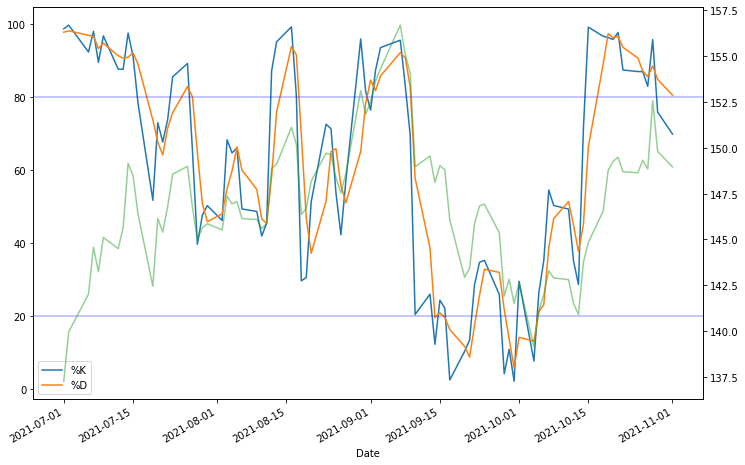

In [30]:
fig, ax =plt.subplots(figsize = (12,8))
data[['%K','%D']]['2021-07-01':].plot(ax=ax)
data['Close']['2021-07-01':].plot(ax=ax, alpha =.5, secondary_y =True)
ax.axhline(80, c='b', alpha=0.3)
ax.axhline(20, c='b', alpha=0.3);